![title](attachment:./title.png)

## Завдання

1. Взяти файл з даними у вiдповiдностi з варiантом.

2. Побудувати частi набори та асоцiативнi правила (АП), використовуючи алгоритм Apriori. Дослiдити множини АП залежно вiд параметрiв побудови АП:

* мiнiмальної пiдтримки,
* мiнiмальної достовiрностi,
* максимальної потужностi частих наборiв.


Пiдiбрати значення параметрiв алгоритму Apriori, якi призводять до
значущих АП. АП Rk вважати значущим, якщо покращення (improvement
або лiфт (lift)): Improv(Rk) > 1.


3. Побудувати частi набори та множину АП, використовуючи алгоритм FPросту.
Дослiдити множини АП залежно вiд параметрiв побудови АП, якi
було наведено вище для Apriori.

Пiдiбрати значення параметрiв алгоритму FP-росту, якi призводять до
значущих АП.

4. Зробити висновки щодо впливу параметрiв алгоритмiв Apriori та FP-росту на знайденi множини АП.
5. Знайти значення прогнозу на основi побудованої множини правил.
6. Порiвняти результати, отриманi алгоритмами Apriori та FP-росту.

#### 6 варіант

Var_6_1000_Transactions

## Теория 

**Навчання асоціативним правилам або пошук асоціативних правил** - це метод навчання машин на базі правил виявлення зв'язків між змінними у великій базі даних. Метод пропонується для встановлення сильних правил, виявлених в базі даних за допомогою деяких вимірів зацікавленості. Цей заснований на правилах підхід генерує також нові правила в міру аналізу додаткових даних.

Для відбору цікавих правил з множини усіх можливих правил, накладають обмеження на різні способи вимірювання значущості та інтересу. Найбільш відомими обмеженнями є мінімальні пороги підтримки та довіри. 

    Підтримка (англ. Support) вказує наскільки часто набір предметів з'являється у наборі даних. 
    Впевненість (англ. Confidence) вказує на те, як часто виконується правило. 
    Ліфт - співвідношення спостережуваної підтримки до очікуваного

Якщо правило має ліфт 1, це означає, що ймовірності появи попередника та наступника є незалежними одна від одної. Коли дві події є незалежними одна від одної, то й не можна вивести правила за участю цих двох подій.

Якщо ліфт > 1, це вказує на те, наскільки ці дві ситуації залежать одна від одної, і робить ці правила потенційно корисними для прогнозування таких послідовностей у майбутніх наборах даних.

Якщо ліфт < 1, це вказує на те, що предмети замінюють один одного. Це означає, що наявність одного товару негативно впливає на наявність іншого товару, і навпаки.

Значення ліфта полягає в тому, що він враховує як впевненість, так і весь набір даних.

Асоціативні правила повинні відповідати мінімальній підтримці та мінімальній впевненості, які визначаються користувачем одночасно. Утворення асоціативних правил, зазвичай, поділяється на два окремих кроки:

    Порогове значення мінімальної затребуваності використовується для знаходження всіх частот предметів у базі даних.
    Обмеження на мінімальну впевненість застосовується до частот наборів предметів для утворення правил.
    
**Алгоритм Apriori**

Алгоритм Apriori шукає асоціативні правила і використовується для великих баз даних. Алгоритм складається з 3-х кроків: 
    1.	Об’єднання – перегляд бази даних та визначення частоти появи окремих товарів.
    2.	Відсічення – ті набори, що задовольняють параметр підтримки та достовірності , переходять на наступну ітерацію з двокомпонентними наборами.
    3.	Повтор – попередні 2 кроки повторюються для усіх наступних потужностей наборів, доки не отримаємо набори з вказаною потужністю.

Дефолтні значення apriori(df, min_support=0.5, use_colnames=False, max_len=None, verbose=0, low_memory=False)

**Параметри:**

    min_support – число в проміжку [0,1] зі значенням мінімальної підходящої підтримки.
    max_len – максимальна кількість елементів в наборі.

Функція association_rules - створює правила DataFrame асоціацій, включаючи показники "оцінка", "впевненість" та "підйом" ('score', 'confidence', and 'lift').

Дефолтні значення association_rules(df, metric='confidence', min_threshold=0.8, support_only=False)

**Параметри:**

    min_threshold – мінімальна  метрика, яка визначає чи є кандидат підходящим.

**Алгоритм FP-growth** 

Алгоритм FP-growth використовується для знаходження повторюваних шаблонів. При першому проході алгоритм підраховує кількість зустрічі кожного елементу в об’єктах дата сету і відсортовує усі елементи в об’єктах у порядку спадання частоти появи. При другому проході будується FP-дерево шляхом вставки екземплярів. Далі проводиться процедура, що виявляє часто повторювані набори.

### 1. Взяти файл з даними у вiдповiдностi з варiантом. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from pathlib import Path
import csv

In [2]:
#pip install mlxtend  

In [3]:
data = pd.read_csv('Var_6_1000_Transactions.csv')
data

,order_id,product_id
0,2,33120
1,2,28985
2,2,9327
3,2,45918
4,2,30035
...,...,...
9715,1000,35951
9716,1000,3025
9717,1000,35734
9718,1000,26800


**Перетворення даних в бінарну таблицю**

In [4]:
def make_orders(id_order, id_item):
    result = []
    add = []
    
    curr_id = id_order[0]
    for i in range(len(id_order)):
        if id_order[i] == curr_id:
            add.append(id_item[i])
        else:
            result.append(add)
            add = []
            curr_id = id_order[i]
            add.append(id_item[i])
    result.append(add)
    return result

In [5]:
orders = make_orders(list(data['order_id']), list(data['product_id']))
print('Number of successful orders: ', len(set(data['order_id'])))

print('Orders (5):\n')
for i in range(5):
    print(i,':',orders[i])

Number of successful orders:  956
Orders (5):

0 : [33120, 28985, 9327, 45918, 30035, 17794, 40141, 1819, 43668]
1 : [33754, 24838, 17704, 21903, 17668, 46667, 17461, 32665]
2 : [46842, 26434, 39758, 27761, 10054, 21351, 22598, 34862, 40285, 17616, 25146, 32645, 41276]
3 : [13176, 15005, 47329, 27966, 23909, 48370, 13245, 9633, 27360, 6348, 40878, 6184, 48002, 20914, 37011, 12962, 45698, 24773, 18569, 41176, 48366, 47209, 46522, 38693, 48825, 8479]
4 : [40462, 15873, 41897]


In [6]:
def encoding(orders):
    encoder = TransactionEncoder()
    data = encoder.fit(orders).transform(orders)
    return pd.DataFrame(data, columns=encoder.columns_)

In [7]:
data_frame = encoding(orders)
data_frame.astype("int")[0:5]

,23,27,28,34,45,54,79,86,95,129,...,49519,49520,49533,49588,49605,49610,49621,49628,49667,49683
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2. Побудувати частi набори та асоцiативнi правила (АП), використовуючи алгоритм Apriori.
### +3. Побудувати частi набори та множину АП, використовуючи алгоритм FP-росту.

Дослiдити множини АП залежно вiд параметрiв побудови АП:

* мiнiмальної пiдтримки,
* мiнiмальної достовiрностi,
* максимальної потужностi частих наборiв.

Пiдiбрати значення параметрiв алгоритму Apriori, якi призводять до
значущих АП.

Раніше проводила дослідження залежності min lift від max_len, цей параметр мало змінюється на кожній ітерації, тому дослідемо залежність min confidence від max_len

In [8]:
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

In [9]:
def rules_support_plot(num_rules, metric_name, metric_values, confs):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
    
    ax1.plot(metric_values, num_rules)
    ax1.set_xlabel(metric_name)
    ax1.set_ylabel('number of rules')
    
    ax2.plot(metric_values, confs)
    ax2.set_xlabel(metric_name)
    ax2.set_ylabel('max confidence')
    
    plt.show()

In [28]:
def analyze_support_lenght(df, algorithm):
    max_confs1 = []
    n_rules1 = []
    supports = [0.003+i*10**(-3) for i in range(6)]
    length = [ 2, 3, 4]
    
    for support in supports:
        print('min_support: ', support)
        
        rules = association_rules(algorithm(df, min_support=support), metric='confidence', min_threshold=0.5)
        #print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
        
        n_rules1.append(len(rules.index))
        max_confs1.append(max(list(rules['confidence'])))
        
        n_rules2 = []
        max_confs2 = []
        
        for lng in length:
            
            rules = association_rules(algorithm(df, min_support=support, max_len = lng), metric='confidence', min_threshold=0.5)
            n_rules2.append(len(rules.index))
            if(len(list(rules['confidence']))):
                max_confs2.append(max(list(rules['confidence'])))
            else:
                max_confs2.append(0.0)
        
        rules_support_plot(n_rules2, 'max_len', length, max_confs2)
          
    rules_support_plot(n_rules1,'min_support', supports, max_confs1)

In [11]:
def rules_confidence_plot(num_rules, confidence):
    plt.plot(confidence, num_rules)
    plt.xlabel('min_confidence')
    plt.ylabel('number of rules')
    plt.show()

In [12]:
def analyze_confidence(df, algorithm):
    confs = [i*0.1 for i in range(5, 11)]
    n_rules = []
    
    for conf in confs:
        print('Confidence: ', conf)
        rules = association_rules(algorithm(df, min_support=0.004, max_len = 3), metric='confidence', min_threshold=conf)
        
        #print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
        n_rules.append(len(rules.index))
        
    rules_confidence_plot(n_rules, confs)

##### Apriory

min_support:  0.003
min_support:  0.004
min_support:  0.005
min_support:  0.006
min_support:  0.007
min_support:  0.008


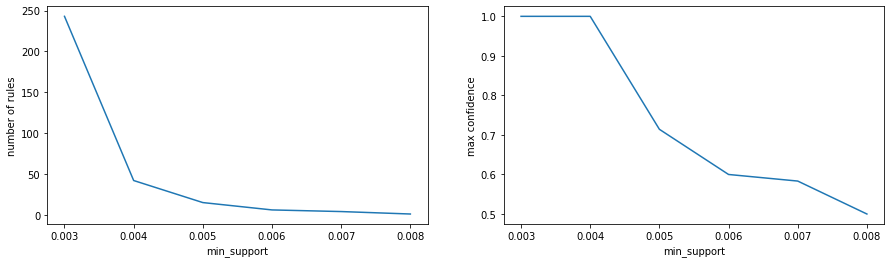

In [29]:
analyze_support_lenght(data_frame, apriori)

Confidence:  0.5
Confidence:  0.6000000000000001
Confidence:  0.7000000000000001
Confidence:  0.8
Confidence:  0.9
Confidence:  1.0


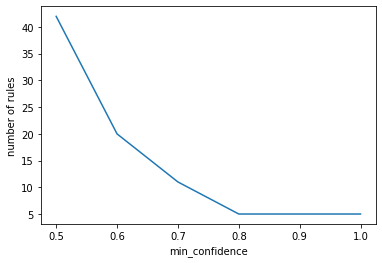

In [14]:
analyze_confidence(data_frame, apriori)

##### FP-growth

min_support:  0.003
min_support:  0.004
min_support:  0.005
min_support:  0.006
min_support:  0.007
min_support:  0.008


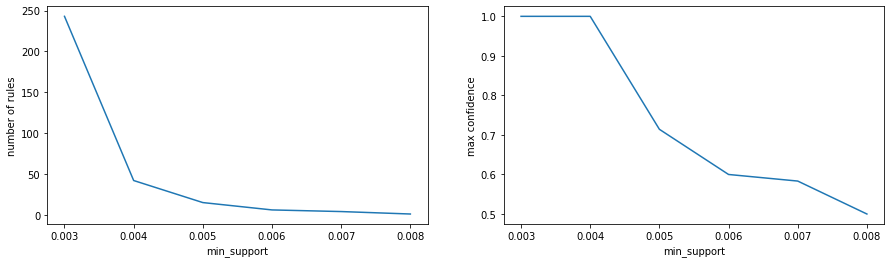

In [30]:
analyze_support_lenght(data_frame, fpgrowth)

Confidence:  0.5
Confidence:  0.6000000000000001
Confidence:  0.7000000000000001
Confidence:  0.8
Confidence:  0.9
Confidence:  1.0


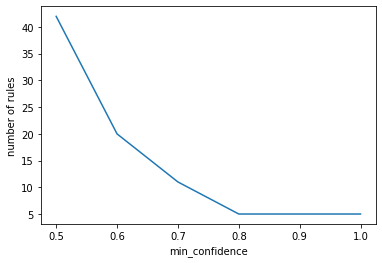

In [16]:
analyze_confidence(data_frame, fpgrowth)

### 4. Зробити висновки щодо впливу параметрiв алгоритмiв Apriori та FP-росту на знайденi множини АП.


1. З графаків залежності кількості правил від максимальної потужності частих наборів видно, що зі збільшенням мінімальної підтримки зменшується максимальна потужність, а покращення(лифт) залишається сталим.

2. З графіків залежності кількості прикладів від мінімальної підтримки видно, що до значення support = 0.004 кількість прикладів різко падає, а починаючи від 0.004 спадає дуже повільно.

Ці два пункти є досить інтуїтивно зрозумілі з самого означення підтримки та достовірності. Очевидно, що набори з великою потужністю будуть зустрічатися рідше, ніж малою потужністю. До того ж кількість наборів, які зустрічаються рідше є більшою, ніж наборів, які зустрічаються часто; звідси стрімкий спад кількості правил до пітримки при дуже малій підтриці, адже кожен набір зустрічається хоча б 1 раз.

1. Зі збільшенням достовірності зменшується кількість правил.
2. Зі збільшенням  підтримки зменшується достовірність правил.

### 5. Знайти значення прогнозу на основi побудованої множини правил.

In [22]:
def make_predict(df, algorithm):
    rules = association_rules(algorithm(df, min_support=0.002), metric='lift', min_threshold=1.0)
    r=rules[rules['confidence']==1].sort_values('support', ascending=[False]).head()
    display(r)
    r=rules[rules['support'] > 0.01].sort_values('support', ascending=[False]).head()
    display(r)
    r=rules[rules['lift'] > 100].sort_values('lift', ascending=[False]).head(20)
    display(r)
    r=rules[(rules['support']>0.004)&(rules['confidence']>0.5)]
    display(r)

##### Apriori

In [23]:
make_predict(data_frame, apriori)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
129,(91),(1953),0.010460,0.069038,0.006276,0.600000,8.690909,0.005554,2.327406
163,(126),(1144),0.007322,0.122385,0.004184,0.571429,4.669109,0.003288,2.047768
390,(402),(2221),0.005230,0.158996,0.004184,0.800000,5.031579,0.003353,4.205021
567,(461),(1144),0.007322,0.122385,0.004184,0.571429,4.669109,0.003288,2.047768
630,(485),(2221),0.012552,0.158996,0.007322,0.583333,3.668860,0.005326,2.018410
1641,(2332),(1144),0.007322,0.122385,0.004184,0.571429,4.669109,0.003288,2.047768
1693,(2675),(1144),0.013598,0.122385,0.007322,0.538462,4.399737,0.005658,1.901499
1809,(3889),(1144),0.006276,0.122385,0.004184,0.666667,5.447293,0.003416,2.632845
2905,(2057),(1953),0.005230,0.069038,0.004184,0.800000,11.587879,0.003823,4.654812
2919,(2286),(1953),0.006276,0.069038,0.004184,0.666667,9.656566,0.003751,2.792887


##### FP-growth

In [19]:
make_predict(data_frame, fpgrowth)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2384,"(2313, 1953)",(2221),0.007322,0.158996,0.00523,0.714286,4.492481,0.004066,2.943515




1. Як можна побачити з таблиць, багато правил має достовірність, рівну 1, що означає, що товар-"antecedents", купується лише з товаром-"consequents". Однак підтримка цих правил є дуже малою. Максимального значення пітримки (0.004184) при цьому набуває 5 правил, проте найбільше значення метрики 'lift' має правило:

(4173) -> (2975)

2. Оскільки обсяг пропозиції товарів (>49683, з них 4438 куплено хоча б 1 раз) значно перевищує кількість покупок (956 успішних замовлень, в сумі 9720 куплених товарів), при чому кількість товарів в одному замовленні є невеликою, то максимальна можлива підтримка є досить малою. Максимального значення (0.025105) набуває 2 правила, але вищу достовірність має правило:

(1953) -> (2221)

3. Максимального значення метрики 'lift' набуває багато правил, які при цьому мають максимальну достовірність, проте дуже малу підтримку (зустрічаються ~2 рази з 956).


* Правило, яке має не максимальні, але відносно високі метрики:

(2313, 1953) -> (2221)


Зважаючи на велику різницю між пропозицією та замовленями, вибрати 1 найточніше правило не можна, бо якщо правила зустрічаються частіше, то мають малу достовірність, а якщо мають максимальну достовірність, то зустрічаються <5 раз.

### 6. Порiвняти результати, отриманi алгоритмами Apriori та FP-росту.

Результати алгоритму FP-growth в точності повторюють результати алгоритму Apriori. Варто зазначити те, що алгоритм FP-growth працює трохи швидше від Apriori приблизно в 2-3 рази.
Найбільший вплив має параметр min_support та min_conf, а найменший – max_len. При збільшенні min_support кількість знайдених наборів значно зменшується. Зменшення кількості наборів також відбувається після збільшення min_threshold. Оцінка покращення lift збільшилась при збільшенні параметру min_conf, тому можна сказати, що найкращими серед перелічених є моделі, в яких параметр min_conf = 0.6. Для max_len були перевірені значення  2, 3, 4 але для них не можливо побудувати, тому були використані більші значення, але вони не дають видимих змін. Це все також через малий набір даних. Найкрвщий параметр min_support=0.004, бо для менших за нього кількість правил буже зменшується, а за більшого значення min_conf значно зменшується 